In [20]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [21]:
import matplotlib.pyplot as plt
import os
import pandas as pd
from datetime import datetime, timedelta
import numpy as np

In [22]:
# Get data
# os.system("./get_data.sh")

In [23]:
# Remove _data from directory
# main_data_dir="../hpa_test_data_LoadBalancer/"

# for directory in os.listdir(main_data_dir):
#     new_dir = "_".join(directory.split("_")[:-1])
#     os.system(f"mv {main_data_dir}/{directory} {main_data_dir}/{new_dir}")

In [24]:
def get_time_in_s(x):
    x = x.split("T")[-1]
    x = datetime.strptime(x, '%H:%M:%S.%f')
    a_timedelta = x - datetime(1900, 1, 1)
    seconds = a_timedelta.total_seconds()
    return seconds

def get_time_date(x):
    x = x.split("T")[-1]
    x = datetime.strptime(x, '%H:%M:%S.%f')
    return x

def locust_get_time_in_s(x):
    a_timedelta = x - datetime(1900, 1, 1)
    seconds = a_timedelta.total_seconds()
    
    return seconds 

def locust_get_time(x):
    return datetime.strptime(x, "%H:%M:%S")

def plot_request_per_second(df_locust, df_stat):
    plt.title("Requests per second")
    plt.plot(df_locust["Time_in_s"], df_locust["values"], label="rps")
    plt.plot(df_locust["Time_in_s"], df_locust["fails"], label="fails")
    plot_hline_for_scaling_event(df_stat)
    plt.xlabel("s")
    plt.ylabel("rps")
    plt.xticks(rotation=30)
    plt.legend()
    plt.show()

def plot_users_per_second(df_locust):
    plt.title("users per second")
    plt.plot(df_locust["Time_in_s"], df_locust["users"], label="users")
    plt.xlabel("s")
    plt.ylabel("users")
    plt.xticks(rotation=30)
    plt.legend()
    plt.show()    
    

    
def plot_response_times_per_second(df_locust, df_stat):
    plt.title("Response time per second")
    plot_hline_for_scaling_event(df_stat)
    plt.plot(df_locust["Time_in_s"], df_locust["response_time_95"], label="response_time_95")
    plt.plot(df_locust["Time_in_s"], df_locust["response_time_50"], label="response_time_50")
    plt.xlabel("s")
    plt.ylabel("response_time")
    plt.xticks(rotation=30)
    plt.legend()
    plt.show()   
    
def plot_memory(df):
    plt.plot(df["Time_in_s"], df["Memory"])
    plt.xlabel("s")
    plt.xticks(rotation=30)
    plt.ylabel("Memory")
    plt.show()

def plot_cpu_per_pod(df, pod, color="b"):
    plt.title(f"CPU usage pod {pod}")
        
    # Plot the cpu at a gradient of 1 precent, get microseconds of CPU per s (milicore)
    try:
        plt.plot(df["Time_in_s"], np.gradient(df["CPU"]), label=f"cpu {pod}", color=color)
    except:
        print("to small")
#     if "proxy" in pod:
#         # Plot bf cpu request and limit
#         plt.axhline(int(PROXY_LIMITS_CPU.replace("m", "")), color="r", label=f"CPU limit {pod}")
#         plt.axhline(int(PROXY_REQUEST_CPU.replace("m", "")), color="g", label=f"CPU request{pod}")
        
#     if "server" in pod:
#         # Plot bf cpu request and limit
#         plt.axhline(int(SERVER_LIMITS_CPU.replace("m", "")), color="r", label=f"CPU limit {pod}")
#         plt.axhline(int(SERVER_REQUEST_CPU.replace("m", "")), color="g", label=f"CPU request{pod}") 
        
#     if "epi-bf" in pod:
#         # Plot bf cpu request and limit
#         plt.axhline(int(BF_LIMITS_CPU.replace("m", "")), color="r", label=f"CPU limit {pod}")
#         plt.axhline(int(BF_REQUEST_CPU.replace("m", "")), color="g", label=f"CPU request{pod}")

#     if "locust" in pod:
#         # Plot bf cpu request and limit
#         plt.axhline(int(CLIENT_LIMITS_CPU.replace("m", "")), color="r", label=f"locust CPU limit {pod}")
#         plt.axhline(int(CLIENT_REQUEST_CPU.replace("m", "")), color="g", label=f"locust request {pod}")


    plt.xlabel("s")
    plt.ylabel("CPU (milicore)")
    plt.xticks(rotation=30)
    plt.legend()
        
def get_limits():
        # Get bf milicore data
    with open(f"{data_directory}/bf_milicore.txt") as f:
        for i, x in enumerate(f.readlines()):
            if i == 0:
                BF_LIMITS_CPU, BF_REQUEST_CPU, BF_LIMITS_MEM, BF_REQUEST_MEM = x.split(",")
            if i == 1:
                SERVER_LIMITS_CPU, SERVER_REQUEST_CPU, SERVER_LIMITS_MEM, SERVER_REQUEST_MEM = x.split(",")
            if i == 2:
                PROXY_LIMITS_CPU, PROXY_REQUEST_CPU, PROXY_LIMITS_MEM, PROXY_REQUEST_MEM = x.split(",")
            if i == 3:
                CLIENT_LIMITS_CPU, CLIENT_REQUEST_CPU, CLIENT_LIMITS_MEM, CLIENT_REQUEST_MEM = x.split(",")


def get_custom_time_in_datetime(x, start_point):
    x = datetime.fromtimestamp(x)
    x = x.strftime('%H:%M:%S.%f')
    x = datetime.strptime(x, "%H:%M:%S.%f")
    min_two_hours = x - timedelta(hours=2, minutes=0)
    x = datetime.strptime(min_two_hours.strftime("%H:%M:%S.%f"), '%H:%M:%S.%f')
    a_timedelta = x - datetime(1900, 1, 1)
    seconds = a_timedelta.total_seconds()
    
    return seconds - start_point    
                
def plot_custom(data_directory, start_point):  
    with open(f"{data_directory}/custom_metrics_requests_rate.txt") as f:
        df_custom = pd.read_csv(f, sep=" ", names=["time", "request_rate"])
    
    df_custom = df_custom.dropna()
    df_custom['time'] = df_custom['time'].apply(lambda x: get_custom_time_in_datetime(x, start_point))

    plt.title(f"Custom metric: request_rate")
        
    # Plot the cpu at a gradient of 1 precent, get microseconds of CPU per s (milicore)
    plt.plot(df_custom["time"], df_custom["request_rate"])
    plt.xlabel("s")
    plt.ylabel("request per second")
    plt.show()

    
  

In [25]:


def get_time_in_s_stat(x, start_point):
    x = x.split("T")[-1]
    x = datetime.strptime(x, '%H:%M:%S.%f')
    min_two_hours = x - timedelta(hours=2, minutes=0)
    x = datetime.strptime(min_two_hours.strftime("%H:%M:%S.%f"), '%H:%M:%S.%f')
    a_timedelta = x - datetime(1900, 1, 1)
    seconds = a_timedelta.total_seconds()

    return seconds - start_point



def get_stat(data_directory, start_point):
    df_stat = pd.read_csv(f"{data_directory}/hpa_stats.txt", sep=",", names=["Time", "currentReplicas"])
    df_stat = df_stat.dropna()
    df_stat = df_stat.reset_index()
    df_stat["Time_in_s"] = df_stat["Time"].apply(lambda x: get_time_in_s_stat(str(x), start_point))
    df_stat["Time_in_s"] =  df_stat["Time_in_s"] 
    return df_stat
 

def plot_stats(df_stat):
    plt.title(f"Number of pods")
        
    # Plot the cpu at a gradient of 1 precent, get microseconds of CPU per s (milicore)
    plt.plot(df_stat["Time_in_s"], df_stat["currentReplicas"])
    plt.xlabel("s")
    plt.ylabel("Number of pods")
    plt.show()

In [26]:
def get_datetime_response_time(x):
    x = datetime.fromtimestamp(x)
    x = x.strftime('%H:%M:%S.%f')
    x = datetime.strptime(x, "%H:%M:%S.%f")
    return x
    
def get_response_datetime(df):
    df['time_datetime'] = df['time'].apply(lambda x: get_datetime_response_time(x))
    return df 

def plot_response_time(data_directory):
    df = pd.read_csv(f"{data_directory}/response_times", names=["time", "respone_time"])
    df = get_response_datetime(df)
    df = df.set_index("time_datetime")
    df = df.resample("1s").mean()
    plt.xticks(rotation=30)
    plt.plot(df.index, df["respone_time"])
    plt.show()

NUMBER_OF_USERS 10, HPA_UTILIZATION 30, Test_no 1


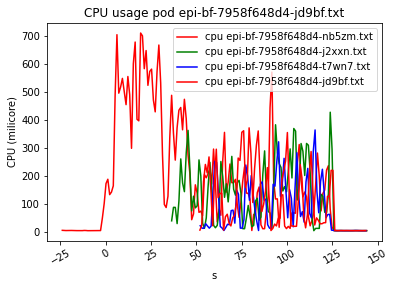

                           CPU  new_time_datetime
Time_datetime                                    
1900-01-01 07:36:30   6.524208            27390.0
1900-01-01 07:36:31   5.948735            27391.0
1900-01-01 07:36:32   5.740458            27392.0
1900-01-01 07:36:33   5.892600            27393.0
1900-01-01 07:36:34   5.823430            27394.0
...                        ...                ...
1900-01-01 07:39:14  21.853080            27554.0
1900-01-01 07:39:15  16.060441            27555.0
1900-01-01 07:39:16  21.548409            27556.0
1900-01-01 07:39:17  21.740694            27557.0
1900-01-01 07:39:18   5.278829            27558.0

[169 rows x 2 columns]


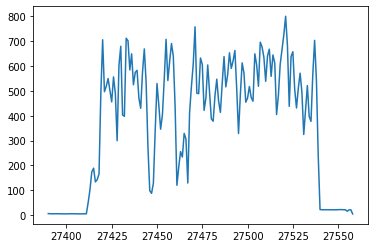

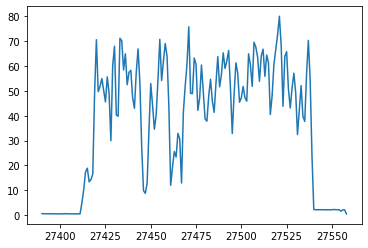

FileNotFoundError: [Errno 2] No such file or directory: '../hpa_test_data_lite/TEST_NO_2/locust_data.csv'

In [45]:
def get_locust_data(data_directory):
    locust_csv = f"{data_directory}/locust_data.csv"
    df_locust = pd.read_csv(locust_csv)
    df_locust['time'] = df_locust['time'].apply(lambda x: locust_get_time(x))
    df_locust["Time_in_s"] = df_locust["time"].apply(lambda x: locust_get_time_in_s(x))
    # Start point to make everything start at zero seconds
    start_point = df_locust["Time_in_s"][0] 
    df_locust["Time_in_s"] = df_locust["Time_in_s"] -  start_point  
     
    return start_point, df_locust

def plot_cpu_per_pods_and_fix_timestamps(data_directory, pod, i):
    colors = ["r", "g", "b", "orange", "yellow", "brown"]

    f_name = f"{data_directory}/" + pod        
    df = pd.read_csv(f_name, delimiter=",")
    df = df.iloc[5:]
    df = df.reset_index()
    # Convert values 
    df["Time_in_s"] = df["Time"].apply(lambda x: get_time_in_s(x))
    # Locust has zero point
    df["Time_in_s"] = df["Time_in_s"] - start_point
    df["Time_datetime"] = df["Time"].apply(lambda x: get_time_date(x))
    # cpu is in nanosecond so dive by 1000 is microsecond divide by 100 is milicore
    df["CPU"] = (df["CPU"] / 1000) / 1000
    
    plot_cpu_per_pod(df, pod, color=colors[i % len(colors)])

    return df



    
def plot_proxy_server_cpu():
    for i, pod in enumerate(os.listdir(data_directory)):
        if pod.startswith("locust_data") or pod.startswith("bf") or \
            pod.startswith("locust_stat") or pod.startswith("vms_stats.csv") \
            or pod.startswith("epi-bf") or pod.startswith(""):
            continue
        
        plot_cpu_per_pods_and_fix_timestamps(data_directory, pod, i)
        
        plt.show()
    
def get_number_of_pods(data_directory):
    counter = 0 
    for i, pod in enumerate(os.listdir(data_directory)):
        if pod.startswith("epi-bf"):
            counter+=1
            
    return counter


def plot_hline_for_scaling_event(df_stat):
    old_replicas = 0
    times = []
    replicas = []
    for index, row in df_stat.iterrows():
        if old_replicas != row["currentReplicas"]:
            times.append(row["Time_in_s"])
            replicas.append(row["currentReplicas"])
            old_replicas = row["currentReplicas"]

    for x in times:
        plt.axvline(x, color="r")

        
        
        
def plot_pods(data_directory):
    df_cpus = []
    for i, pod in enumerate(os.listdir(data_directory)):
        if not pod.startswith("epi-bf"):
            continue
            
        
        df_cpu_pod_n = plot_cpu_per_pods_and_fix_timestamps(data_directory, pod, i)
        df_cpus.append(df_cpu_pod_n)
        
    plt.show()

    old_max = 0
    df_cpu_total = None


    
    for i, df in enumerate(df_cpus):
        df["CPU"] = np.gradient(df["CPU"])
        df = df.set_index("Time_datetime")
        df = df.resample("1s").mean()
#         df = df.set_index("Time_in_s")

        if i == 0:
            df_cpu_total = df["CPU"]
        else:
            df_cpu_total = df["CPU"].add(df_cpu_total, fill_value=0)
    
    df_cpu_total = df_cpu_total.to_frame()
    df_cpu_total["new_time_datetime"] = list(df_cpu_total.index.to_pydatetime())
    df_cpu_total["new_time_datetime"] = df_cpu_total["new_time_datetime"].apply(lambda x: locust_get_time_in_s(x))
    print(df_cpu_total)

#     df["Time_in_s"] = df["Time_in_s"] - start_point
    
    plt.plot(df_cpu_total["new_time_datetime"], df_cpu_total["CPU"], label="total")
    
    plt.show()
    
    plt.plot(df_cpu_total["new_time_datetime"], (df_cpu_total["CPU"]/1000)*100, label="total")
    
    plt.show()
    
colors = ["r", "g", "b", "orange", "yellow", "brown"]
main_data_dir="../hpa_test_data_lite"
df_experiment = pd.read_csv("../usecases_test_vars.csv")

for number_of_users in df_experiment["NO_OF_USERS"].drop_duplicates():
    df_number_of_users = df_experiment[df_experiment["NO_OF_USERS"] == number_of_users]
    fails = {}
    avg_response_50 = {}
    avg_response_95 = {}
    avg_response_50_mean = {}
    avg_response_95_mean = {}
    avg_cpu_overhead = {}
    number_of_pods = {}
    times = {}
    indexes = []
    
    
    for test_number in df_number_of_users["TEST_NO"]:
        df_number = df_number_of_users[df_number_of_users["TEST_NO"] == test_number]

        test_dir = f"TEST_NO_{test_number}"
         
#         if test_number != 1:
#             continue
            
        data_directory = f"{main_data_dir}/{test_dir}"
        
        # Get locust data and START POINT
        index = df_number["HPA_UTILIZATION"].iloc[0]

        start_point, df_locust = get_locust_data(data_directory)
        df_stat = get_stat(data_directory, start_point)
        
#         print(data_directory)
        print(f"NUMBER_OF_USERS {number_of_users}, HPA_UTILIZATION {index}, Test_no {test_number}")
        plot_pods(data_directory)
#         plot_proxy_server_cpu()
#         plot_request_per_second(df_locust, df_stat)
#         plot_users_per_second(df_locust)
#         plot_response_times_per_second(df_locust, df_stat)
#         plot_stats(df_stat)
#         plot_response_time(data_directory)
            
        n_pods = get_number_of_pods(data_directory)
    
        index = df_number["HPA_UTILIZATION"].iloc[0]
        if index not in indexes:
            indexes.append(index)
        fails[index] = df_locust["fails"].sum()
        number_of_pods[index] = n_pods
        avg_response_50_mean[index] = df_locust["response_time_50"].mean()
        avg_response_95_mean[index] = df_locust["response_time_95"].mean()
        avg_response_50[index] = df_locust["response_time_50"]
        avg_response_95[index] = df_locust["response_time_95"]
        avg_response_95[index] = df_locust["response_time_95"]
        times[index] = df_locust["Time_in_s"]

    bar_width = 0.25
    start = 0.5
    offset = 0.25
    labels=["fails", "number_of_pods"]
    
#     plt.title(f"Users: {number_of_users}")
#     for i, dictionary in enumerate([fails, number_of_pods]):
#         xrange = [x + (i*+offset) - start  for x in range(len(dictionary))]
#         plt.bar(xrange, list(dictionary.values()), width=bar_width, align='center', label=labels[i])
#         plt.xticks(xrange, list(dictionary.keys()))
#     plt.legend()
#     plt.show()
    
#     plt.title(f"Users {number_of_users}, latency 95 percentile")
#     for index in indexes:
#         plt.plot(times[index], avg_response_95[index], label=f"HPA utilization {index}")
#         plt.plot(times[index], avg_response_50[index], label=f"HPA utilization {index}")
    
    
#     plt.legend()
#     plt.show()